In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import random
import sys
import math
from sklearn.preprocessing import StandardScaler
from numpy.linalg import eig
import sys
from random import seed
import pandas as pd
import cvxpy as cp
import random
import numpy.linalg as la

np.random.seed(1)
seed(1)

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import KFold
import torchvision.datasets as datasets
from torchvision import transforms
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

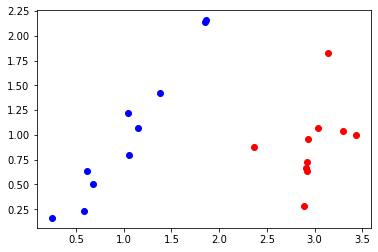

In [59]:
d = 2   
m = 10
n = 10  

x_center = [1,1]  
y_center = [3,1]
np.random.seed(11)  

orientation_x = np.random.rand(2,2)
orientation_y = np.random.rand(2,2)

rx = np.clip(np.random.randn(m,d),-2,2)
ry = np.clip(np.random.randn(n,d),-2,2)
x = x_center + np.dot(rx,orientation_x)
y = y_center + np.dot(ry,orientation_y)

plt.scatter(x[:,0],x[:,1],color='blue')
plt.scatter(y[:,0],y[:,1],color='red')


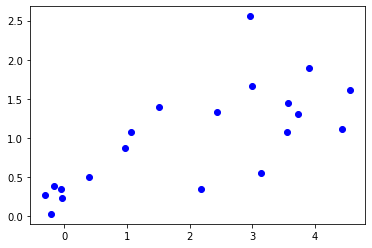

In [100]:
X=np.array([[ 1.51059262,  1.40067875],
       [ 2.96670337,  2.55561409],
       [ 0.39544469,  0.49725317],
       [-0.21266631,  0.03023535],
       [-0.16928619,  0.38868223],
       [ 1.06851304,  1.07122213],
       [-0.05185514,  0.34320484],
       [-0.03671476,  0.23965344],
       [-0.30072546,  0.27130416],
       [ 0.97050387,  0.87136087],
       [ 2.17435609,  0.35362689],
       [ 4.55557849,  1.61682175],
       [ 3.57435727,  1.44706702],
       [ 3.55889914,  1.08129283],
       [ 2.43282845,  1.32955348],
       [ 3.72178634,  1.30848346],
       [ 3.14672832,  0.55361707],
       [ 3.91173875,  1.89393317],
       [ 4.42712701,  1.11754341],
       [ 2.99676087,  1.66429866]])
Y=np.array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1.])

plt.scatter(X[:,0],X[:,1],color='blue')
#plt.scatter(y[:,0],y[:,1],color='red')


In [60]:
X=np.append(x,y,axis=0)
Y=np.append(np.ones(n),np.ones(m)*-1,0)
kernel=False

In [61]:
X

array([[1.04936235, 1.21819511],
       [0.58229564, 0.23570831],
       [0.61986928, 0.63786492],
       [1.38428343, 1.42025898],
       [0.2460875 , 0.16302853],
       [1.86222912, 2.15585575],
       [0.67781296, 0.50394116],
       [1.05410719, 0.79691504],
       [1.84838981, 2.13710879],
       [1.14762772, 1.0655487 ],
       [3.29949043, 1.04229136],
       [2.917829  , 0.63381959],
       [2.90790295, 0.66368678],
       [2.91707297, 0.72435698],
       [3.0382025 , 1.07422392],
       [3.14245468, 1.82752573],
       [2.36656183, 0.8805587 ],
       [2.88455612, 0.28422165],
       [2.92872236, 0.96106219],
       [3.43502336, 1.00081132]])

In [62]:
Y

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1.])

In [63]:
M=X.shape[0]
d=X.shape[1]

In [64]:
Y.shape

(20,)

In [65]:
def gaussian(x,y,sigma=1):
  exponent = -np.sqrt(la.norm(x-y) ** 2 / (2 * sigma ** 2))
  return np.exp(exponent)
def polynomial(x,y,offset=1):
  d=x.shape[1]
  return (offset + np.dot(x, y)) ** d

In [66]:
#dual solver for SVM with Kernel and no kernel
#pass kernel=True to use Kernel
def SVM_OPT_DUAL(X,Y,C=100000,kernel=False):
  M=X.shape[0]
  d=X.shape[1]
  alpha=cp.Variable((M,1))

  K=np.dot(X,X.T)
  Yij=np.dot(Y.reshape(1,-1).T,Y.reshape(1,-1))
  Q=np.multiply(K,Yij)

  obj=cp.Minimize(1/2* cp.quad_form(alpha,Q)-cp.sum(alpha))
  constraints=[]
  constraints+=[cp.sum(cp.multiply(alpha,Y.reshape(-1,1)))==0]
  for i in range(M):
    constraints+=[alpha[i]>=0]
    constraints+=[alpha[i]<=C]
  problem = cp.Problem(obj,constraints)
  problem.solve()
  return alpha.value

In [67]:
# primal solver for SVM
def inner_prod_cp(w,x):
    return cp.sum(cp.multiply(w,x))
def SVM_OPT(X,Y,C=100000,restrictions_on_weight=False):
  M=X.shape[0]
  d=X.shape[1]
  w = cp.Variable(d)
  qi = cp.Variable(M)
  obj=cp.Minimize((1/2)*cp.norm2(w) + cp.sum(qi)*C)
  constraints=[]
  for i in range(M):
    constraints+=[cp.multiply(Y[i],(inner_prod_cp(w,X[i])))+qi[i]>=1,qi[i]>=0]
  max_X=np.max(X,axis=0)
  min_X=np.min(X,axis=0)
  if restrictions_on_weight:
    for i in range(d):
      constraints+=[w[i]<max_X[i]]
      constraints+=[w[i]>min_X[i]]
  problem = cp.Problem(obj,constraints)
  problem.solve()
  return w.value

In [88]:
alpha=SVM_OPT_DUAL(X,Y,kernel=kernel)

In [89]:
alpha

array([[-8.19685890e-21],
       [ 3.07929569e+00],
       [-5.63330343e-21],
       [ 7.64085068e-22],
       [-4.07801236e-20],
       [-8.76092315e-21],
       [-2.58927084e-20],
       [-1.13689860e-20],
       [-3.55547543e-20],
       [ 2.61200665e+00],
       [-2.88571608e-20],
       [-7.98847946e-21],
       [-8.72016749e-21],
       [-1.25284137e-20],
       [ 5.69130233e+00],
       [-9.40175184e-21],
       [-1.90252684e-20],
       [-4.22663527e-21],
       [-1.09027236e-20],
       [-4.58642362e-21]])

In [90]:
def findWandbNoKernel(X,Y,alpha):
  M=X.shape[0]
  W=np.zeros((1,d))
  b=0
  for i in range(M):
    if abs(alpha[i]>0):
      W+=alpha[i]*Y[i]*X[i]
  idx=np.argmax(alpha)
  b=Y[idx]-np.dot(W,X[idx].T)
  return W,b

In [91]:
#finding W and b without kernel
W1,b1=findWandbNoKernel(X,Y,alpha)

In [92]:
W1

array([[-2.17564279,  2.578601  ]])

In [93]:
b1

array([0.86457773])

In [94]:
#Finding w and b using primal
append_one=True
if append_one:
  X_class=np.append(np.ones(X.shape[0]).reshape(-1,1),X,axis=1)
W=SVM_OPT(X_class,Y)

In [95]:
W

array([ 0.86457773, -2.17564279,  2.578601  ])

In [96]:
sv_alphas=(np.abs(alpha)>0.01)

In [97]:
np.sum(sv_alphas)

3

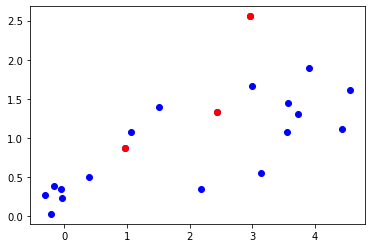

In [98]:
plt.scatter(X[:,0],X[:,1],color='blue')
plt.scatter(X[sv_alphas.reshape(-1)==True,0],X[sv_alphas.reshape(-1)==True,1],color='red')